# 📦 Importing Dependencies

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.offline as py
import plotly.express as px
from pandas.plotting import scatter_matrix

# Getting Data 📂

In [198]:
df=pd.read_csv('/content/housing.csv')

# 1. Introduction

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

* longitude

* latitude

* housing_median_age

* total_rooms

* total_bedrooms

* population

* households

* median_income

* median_house_value

* ocean_proximity

# 2. Exploratory Data Analysis

In [199]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations:-**

    -there are 20,640 instance in the dataset   
    -total_bedrooms 20433 only rest 207 NA
    -ocean is objet

In [201]:
df['median_house_value'].value_counts().head(10).index.unique().values

array([500001., 137500., 162500., 112500., 187500., 225000., 350000.,
        87500., 275000., 150000.])

In [202]:
def  data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulss=[]
    dup=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        unique_val.append(np.array(data[col].value_counts().head(10).index))
        n_uniques.append(data[col].nunique())
        nulss.append(data[col].isnull().sum())
        dup.append(data.duplicated().sum())

    return pd.DataFrame({'Col':cols,'dtype':dtypes,'n_uniques':n_uniques,'n_nan':nulss,'unique_val':unique_val,'duplicated':dup})

In [203]:
data_info(df)

Col    dtype  n_uniques  n_nan  \
0           longitude  float64        844      0   
1            latitude  float64        862      0   
2  housing_median_age  float64         52      0   
3         total_rooms  float64       5926      0   
4      total_bedrooms  float64       1923    207   
5          population  float64       3888      0   
6          households  float64       1815      0   
7       median_income  float64      12928      0   
8  median_house_value  float64       3842      0   
9     ocean_proximity   object          5      0   

                                          unique_val  duplicated  
0  [-118.31, -118.3, -118.29, -118.27, -118.32, -...           0  
1  [34.06, 34.05, 34.08, 34.07, 34.04, 34.09, 34....           0  
2  [52.0, 36.0, 35.0, 16.0, 17.0, 34.0, 26.0, 33....           0  
3  [1527.0, 1613.0, 1582.0, 2127.0, 1717.0, 2053....           0  
4  [280.0, 331.0, 345.0, 343.0, 393.0, 328.0, 348...           0  
5  [891.0, 761.0, 1227.0, 1052.0, 850.0, 825.0, 7...           0  
6  [306.0, 386.0, 335.0, 282.0, 429.0, 375.0, 284...           0  
7  [3.125, 15.0001, 2.875, 2.625, 4.125, 3.875, 3...           0  
8  [500001.0, 137500.0, 162500.0, 112500.0, 18750...           0  
9  [<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND]           0

#### Find district for each catagory of ocean_proximity

In [204]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Categorical Features in Data

In [205]:
Categorical_Features=["ocean_proximity"]

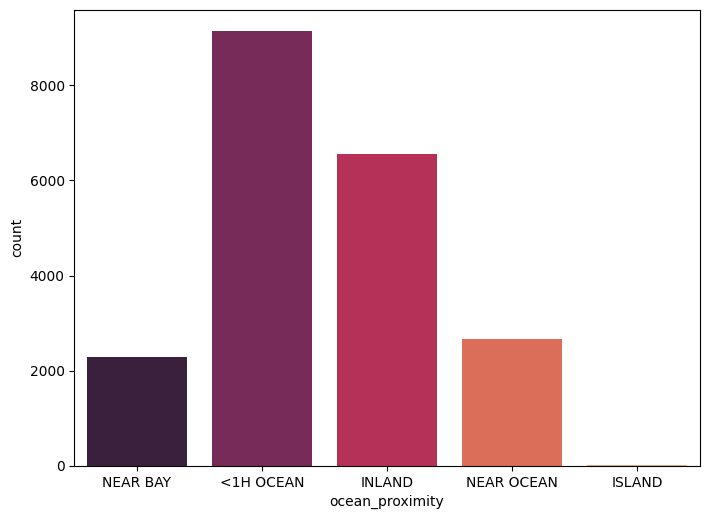

In [206]:
plt.figure(figsize=(20, 10))
for i in range(len(Categorical_Features)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[Categorical_Features[i]],palette="rocket",hue=df[Categorical_Features[i]])

plt.tight_layout()
plt.show()


#### The  higher value is <1H OCEAN

### Continuous  Features in the  data

population            4.935858
total_rooms           4.147343
total_bedrooms        3.459546
households            3.410438
median_income         1.646657
median_house_value    0.977763
latitude              0.465953
housing_median_age    0.060331
longitude            -0.297801
dtype: float64

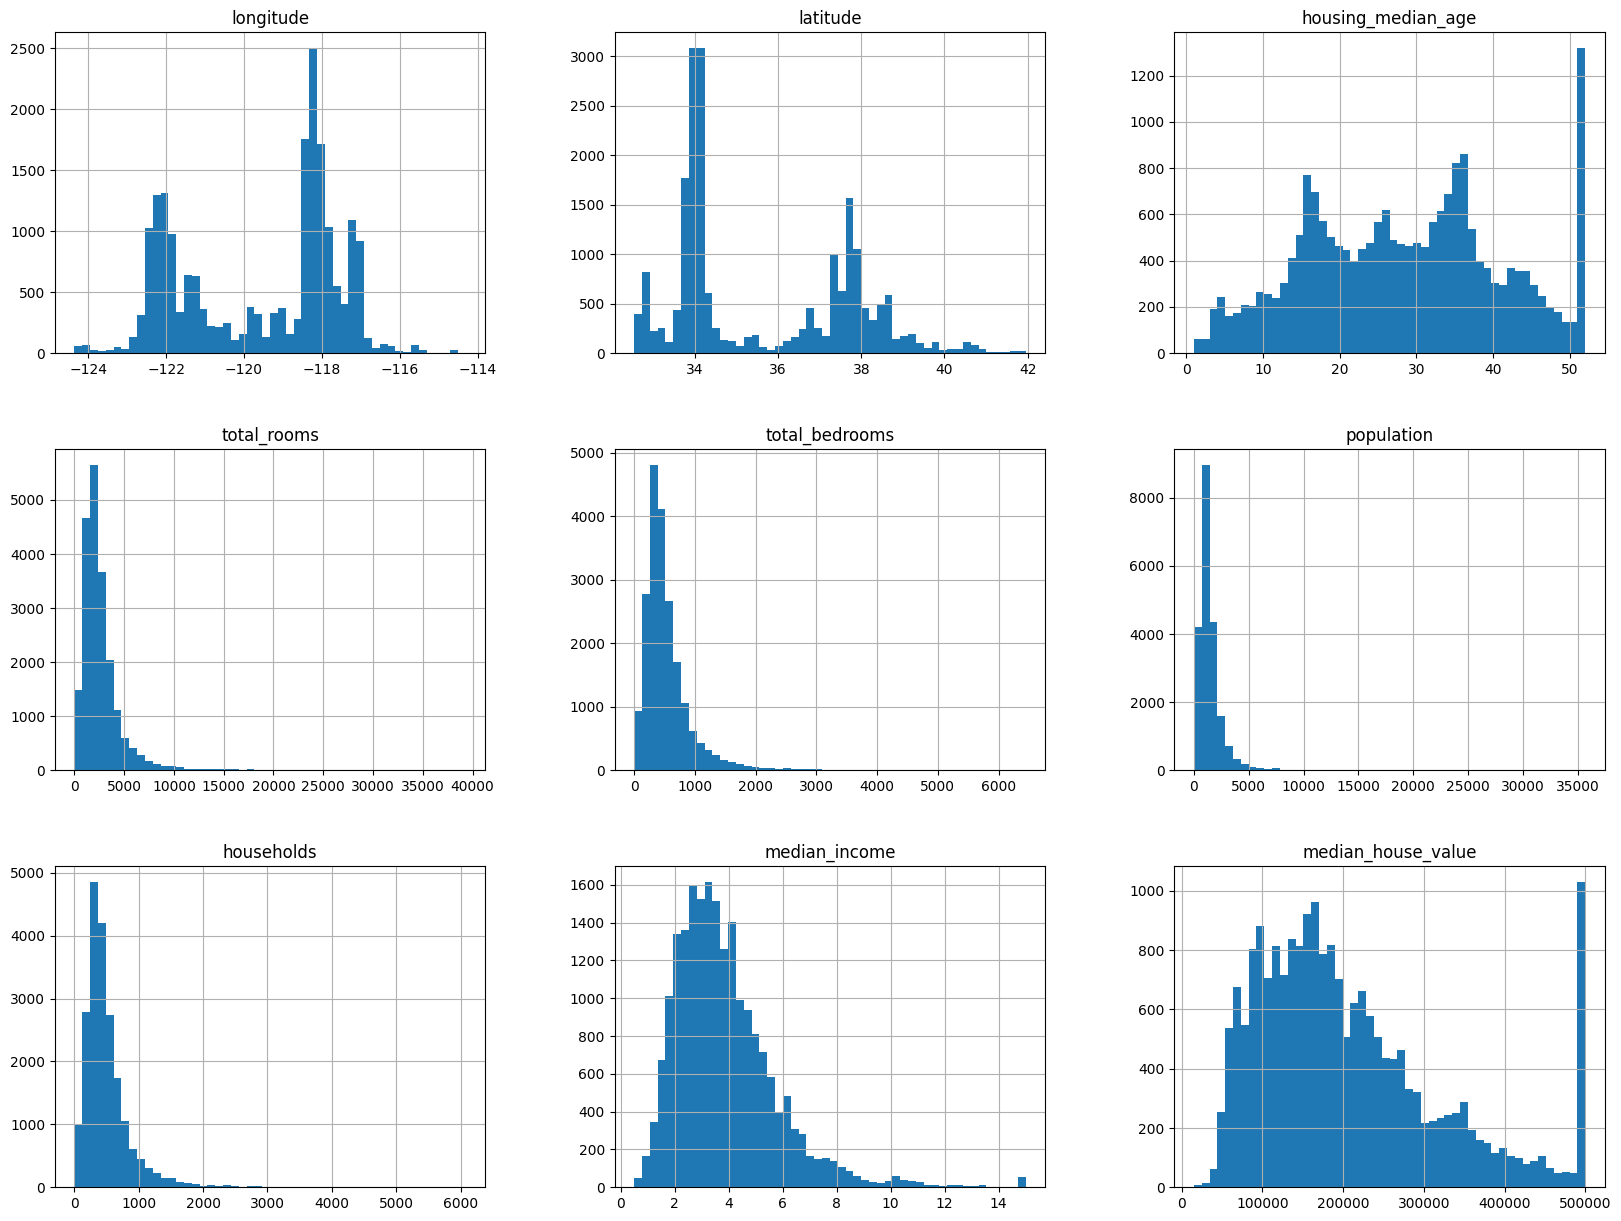

In [207]:
df.hist(bins=50,figsize=(20,15))
df.skew(numeric_only=True).sort_values(ascending=False)

####  We have alot of columns is skew like total_rooms ,total_bedrooms,population,households,median_income,median_house_value

<Axes: >

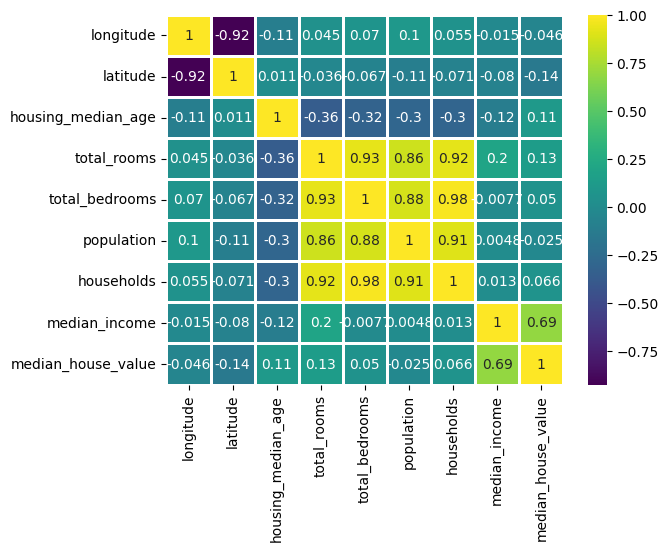

In [208]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,linewidths=2,cmap="viridis")

### very storg realtion between total_rooms and households ,total_brdrooms and household

# 📊 Scatterplot¶


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='households', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='households', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='households', ylabel='total_rooms'>],
       

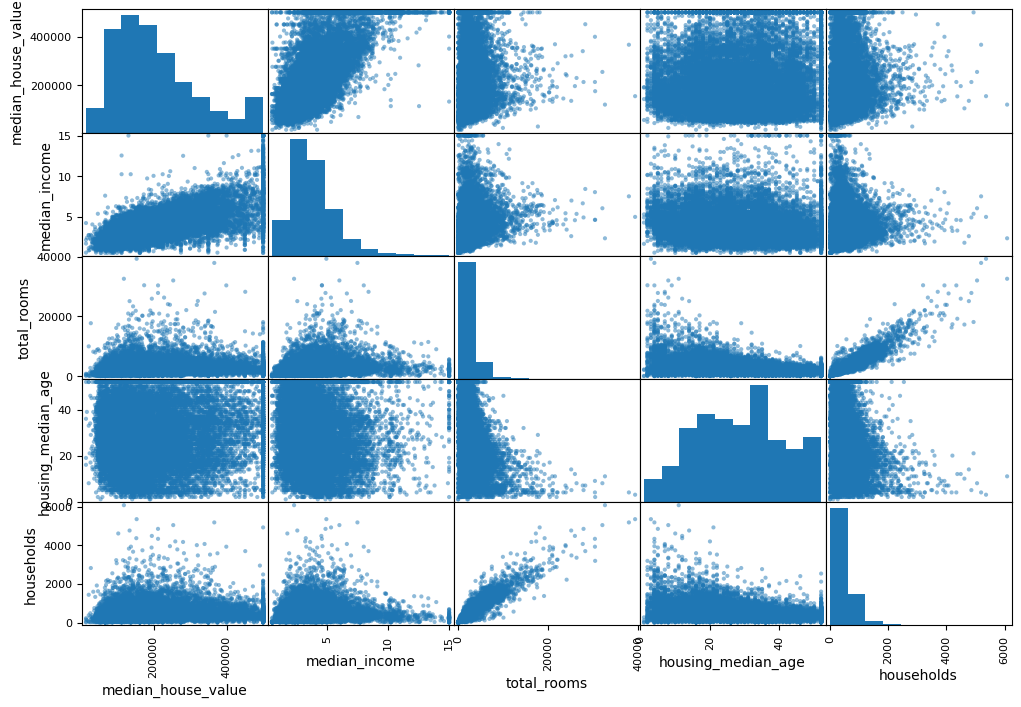

In [209]:
att=["median_house_value","median_income","total_rooms","housing_median_age","households"]
scatter_matrix(df[att],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

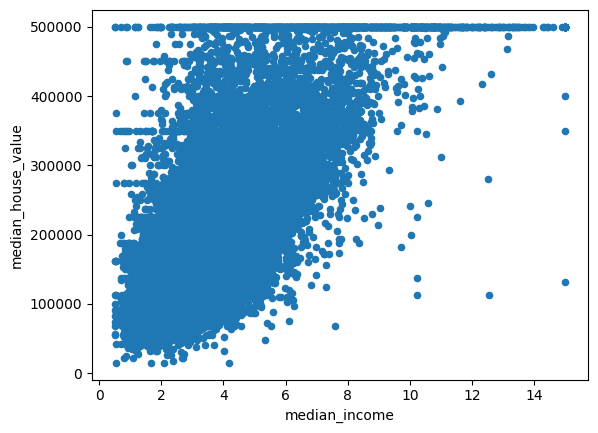

In [210]:
df.plot(kind="scatter",x="median_income",y="median_house_value")

In [211]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Observations:- The correlation is indeed very strong

## Detect the outliers

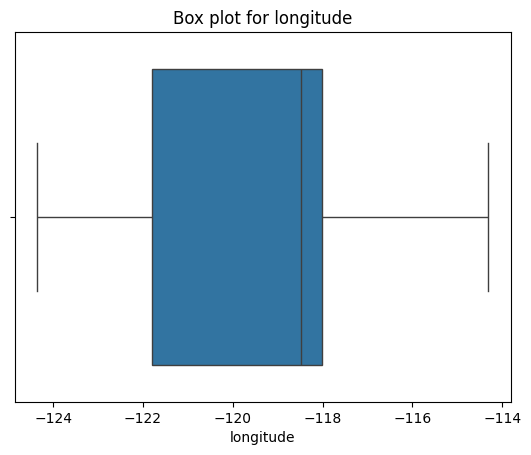

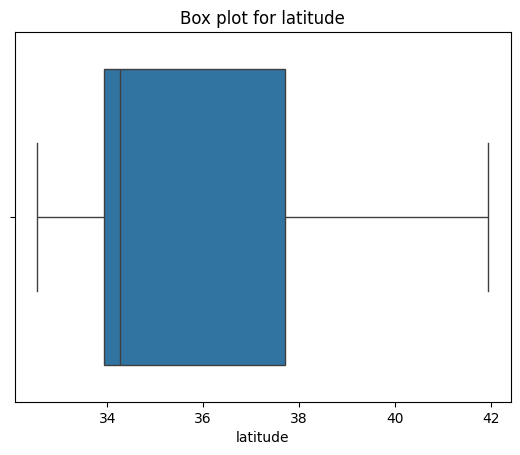

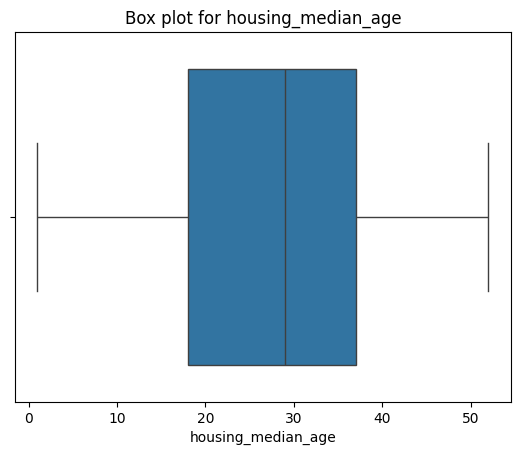

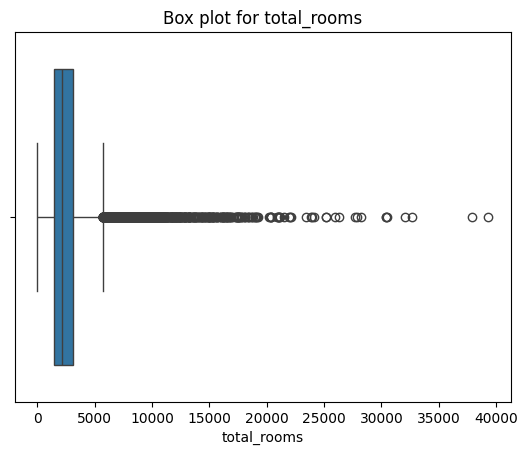

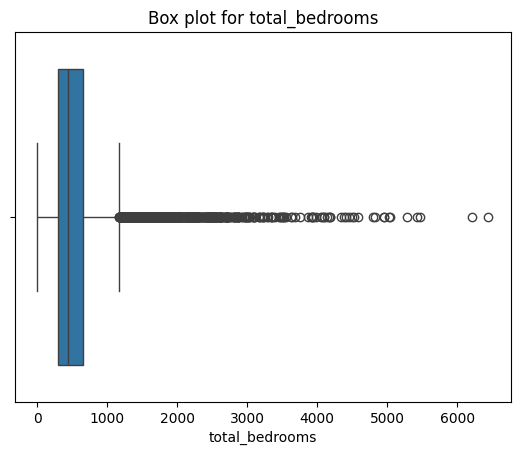

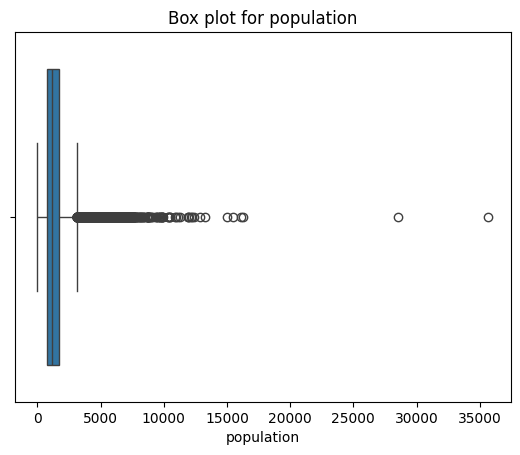

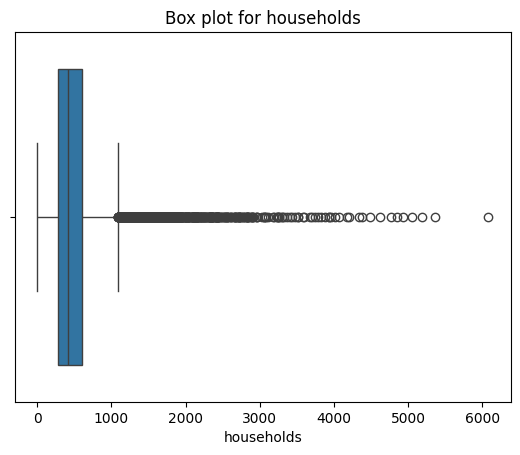

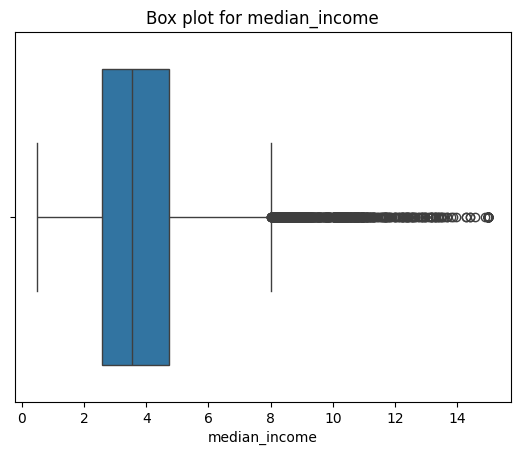

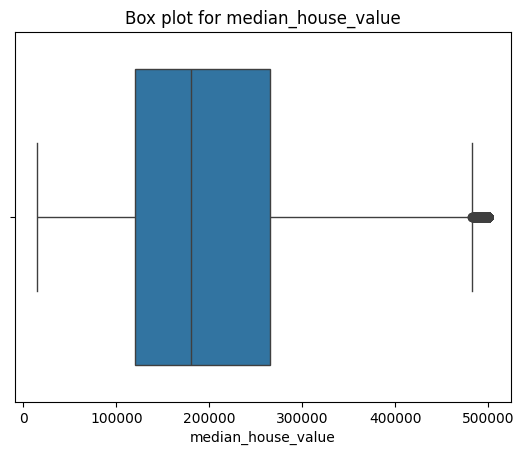

In [212]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
      sns.boxplot(x=numeric_columns[column])
      plt.title(f'Box plot for {column}')
      plt.show()

# Detect missing values (NaN)

In [213]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

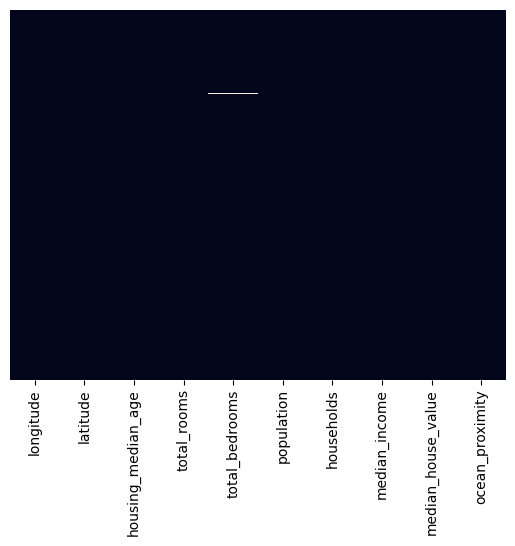

In [214]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

## 🗺 MapPlot

In [215]:
py.init_notebook_mode(connected=True)
map=px.scatter_mapbox(df,
                      lat='latitude',
                      lon='longitude',
                      color='median_house_value',
                      size='population',
                      hover_name='ocean_proximity',
                      height=1000)
map.update_layout(mapbox_style='open-street-map')
map.show()

In [216]:
grouped_data = df.groupby('ocean_proximity')['median_house_value'].median()
sorted_data = grouped_data.sort_values(ascending=False)

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

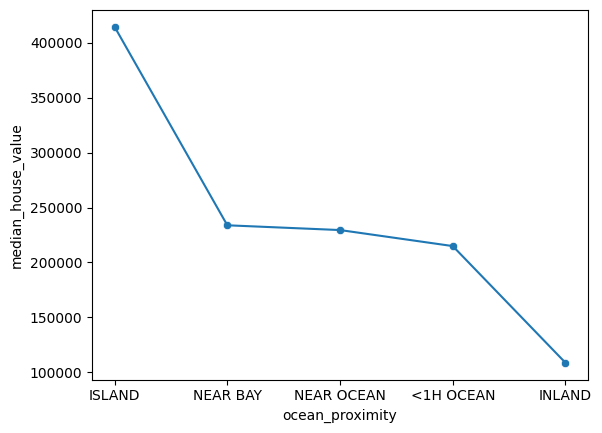

In [217]:
sns.lineplot(sorted_data)
sns.scatterplot(sorted_data)

### So this mean the column Ocean Proximity is oridailay

# 3. Data Preprocessing and Cleaning

### Handing misssing Values (NaN)

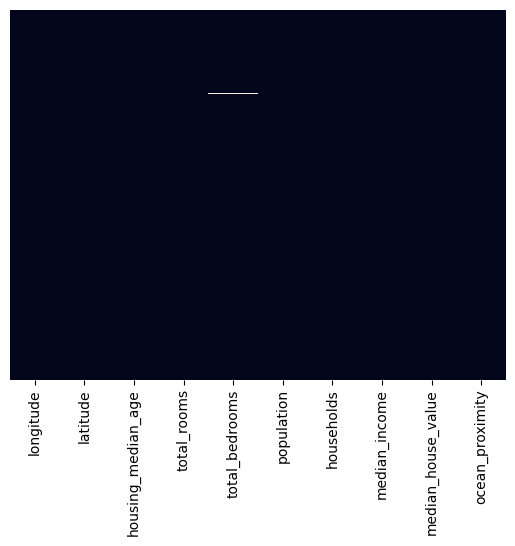

In [218]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [219]:
df["total_bedrooms"].median()

435.0

In [220]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df["total_bedrooms"].median())

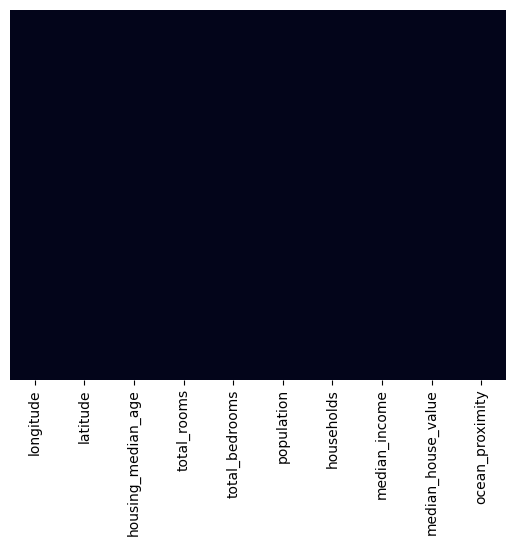

In [221]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

## Duplicated

In [222]:
df.duplicated().sum()

0

## Outlier Dectection (iqr)

In [223]:
q1, q3 = df["total_bedrooms"].quantile([0.25,0.75])
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

In [224]:
print(lower_whisker,upper_whisker)

-222.375 1162.625


In [225]:
outliers = df[(df["total_bedrooms"]>upper_whisker) | (df["total_bedrooms"]<lower_whisker)].index

In [226]:
outliers

Int64Index([   95,    96,    98,   100,   101,   104,   112,   116,   185,
              283,
            ...
            20517, 20519, 20524, 20529, 20530, 20539, 20543, 20544, 20563,
            20629],
           dtype='int64', length=1306)

In [227]:
df.drop(outliers,axis=0)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[19334 rows x 10 columns]

In [228]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        if data[col].dtype != 'object':
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_whisker = q1 - 1.5 * iqr
            upper_whisker = q3 + 1.5 * iqr
            filt =  (data[col] < lower_whisker) | (data[col] > upper_whisker)
            data=data.drop(data[filt].index, axis=0)
    data.reset_index(drop=True,inplace=True)
    return data

In [229]:
columns_skew=df.skew(numeric_only=True).sort_values(ascending=False)

In [230]:
columns_skew.index[:-3]

Index(['population', 'total_rooms', 'total_bedrooms', 'households',
       'median_income', 'median_house_value'],
      dtype='object')

In [231]:
df=remove_outliers_iqr(df,columns_skew.index[:-3])

In [232]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
16966    -121.09     39.48                25.0       1665.0           374.0   
16967    -121.21     39.49                18.0        697.0           150.0   
16968    -121.22     39.43                17.0       2254.0           485.0   
16969    -121.32     39.43                18.0       1860.0           409.0   
16970    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           496.0       177.0         7.2574            352100.0   
1           558.0       219.0         5.6431            341300.0   
2           565.0       259.0         3.8462            342200.0   
3           413.0       193.0         4.0368            269700.0   
4          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
16966       845.0       330.0         1.5603             78100.0   
16967       356.0       114.0         2.5568             77100.0   
16968      1007.0       433.0         1.7000             92300.0   
16969       741.0       349.0         1.8672             84700.0   
16970      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
16966          INLAND  
16967          INLAND  
16968          INLAND  
16969          INLAND  
16970          INLAND  

[16971 rows x 10 columns]

### Outlier Dectection (Z Score)
#### The features are normally or approximately normally distributed.

In [233]:
(df["longitude"] - df["longitude"].mean() ) / df["longitude"].std()

0       -1.316918
1       -1.321912
2       -1.321912
3       -1.321912
4       -1.321912
           ...   
16966   -0.742645
16967   -0.802569
16968   -0.807563
16969   -0.857500
16970   -0.817550
Name: longitude, Length: 16971, dtype: float64

In [234]:
outliers=df[((df["longitude"] - df["longitude"].mean() ) / df["longitude"].std()<-3) | ((df["longitude"] - df["longitude"].mean() ) / df["longitude"].std()>3)].index

In [235]:
df=df.drop(outliers,axis=0)

In [236]:
outliers=df[((df["latitude"] - df["latitude"].mean() ) / df["latitude"].std()<-3) | ((df["latitude"] - df["latitude"].mean() ) / df["latitude"].std()>3)].index

In [237]:
df=df.drop(outliers,axis=0)

In [238]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [239]:
def logTrans(data,features):
    for feature in features:
        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_log = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_log,bins=20, kde=True , legend=False)
        plt.xlabel(feature)
        plt.show()
        print(f"Skewness was {round(data[feature].skew(),5)} before & is {round(df_log[0].skew(),5)} after Log transformation.")
        data[feature] = df_log[0]
    return data

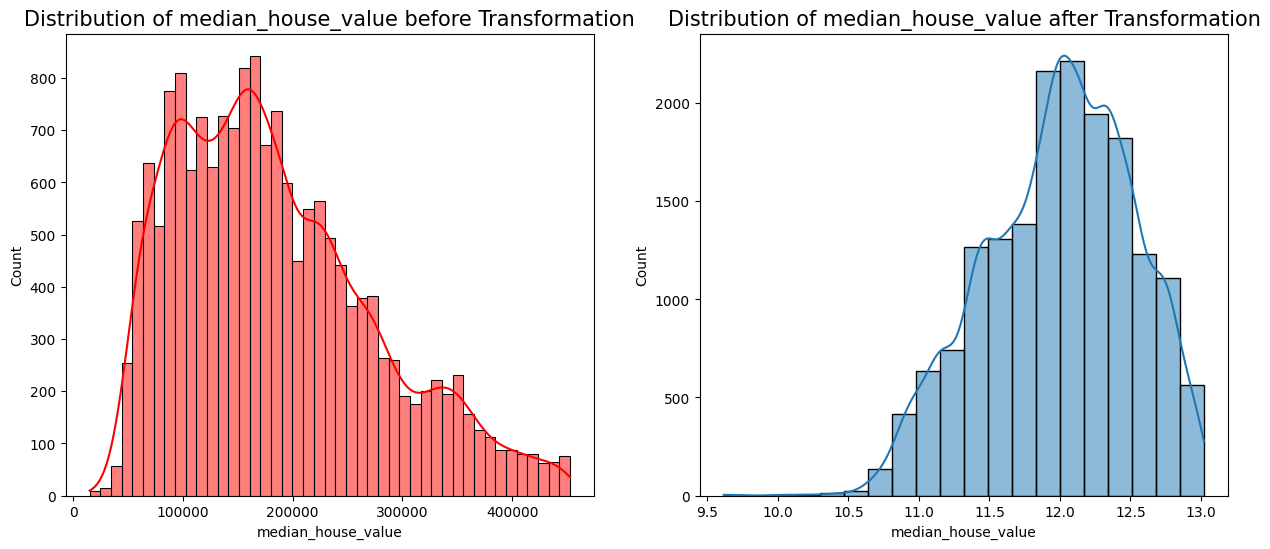

Skewness was 0.71326 before & is -0.32499 after Log transformation.


In [240]:
df=logTrans(df,features=["median_house_value"])

# 4. Encoding Categorical Columns

### OneHotEncoder

In [241]:
from sklearn.preprocessing import OneHotEncoder

In [242]:
info_cat=df[["ocean_proximity"]]
info_cat.head(10)

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY

In [243]:
ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)

In [244]:
info_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [245]:
ohe.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [246]:
info_cat_1hot_df = pd.DataFrame(info_cat_1hot.toarray(), columns=ohe.get_feature_names_out())

In [247]:
df_copy=df.copy()

In [248]:
df_copy

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
16966    -121.09     39.48                25.0       1665.0           374.0   
16967    -121.21     39.49                18.0        697.0           150.0   
16968    -121.22     39.43                17.0       2254.0           485.0   
16969    -121.32     39.43                18.0       1860.0           409.0   
16970    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           496.0       177.0         7.2574           12.771673   
1           558.0       219.0         5.6431           12.740520   
2           565.0       259.0         3.8462           12.743154   
3           413.0       193.0         4.0368           12.505069   
4          1094.0       514.0         3.6591           12.608871   
...           ...         ...            ...                 ...   
16966       845.0       330.0         1.5603           11.265758   
16967       356.0       114.0         2.5568           11.252872   
16968      1007.0       433.0         1.7000           11.432810   
16969       741.0       349.0         1.8672           11.346883   
16970      1387.0       530.0         2.3886           11.400887   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
16966          INLAND  
16967          INLAND  
16968          INLAND  
16969          INLAND  
16970          INLAND  

[16971 rows x 10 columns]

In [249]:
df.merge(info_cat_1hot_df,left_index=True, right_index=True)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
16966    -121.09     39.48                25.0       1665.0           374.0   
16967    -121.21     39.49                18.0        697.0           150.0   
16968    -121.22     39.43                17.0       2254.0           485.0   
16969    -121.32     39.43                18.0       1860.0           409.0   
16970    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           496.0       177.0         7.2574           12.771673   
1           558.0       219.0         5.6431           12.740520   
2           565.0       259.0         3.8462           12.743154   
3           413.0       193.0         4.0368           12.505069   
4          1094.0       514.0         3.6591           12.608871   
...           ...         ...            ...                 ...   
16966       845.0       330.0         1.5603           11.265758   
16967       356.0       114.0         2.5568           11.252872   
16968      1007.0       433.0         1.7000           11.432810   
16969       741.0       349.0         1.8672           11.346883   
16970      1387.0       530.0         2.3886           11.400887   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0            NEAR BAY                        0.0                     0.0   
1            NEAR BAY                        0.0                     0.0   
2            NEAR BAY                        0.0                     0.0   
3            NEAR BAY                        0.0                     0.0   
4            NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
16966          INLAND                        0.0                     1.0   
16967          INLAND                        0.0                     1.0   
16968          INLAND                        0.0                     1.0   
16969          INLAND                        0.0                     1.0   
16970          INLAND                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
16966                     0.0                       0.0   
16967                     0.0                       0.0   
16968                     0.0                       0.0   
16969                     0.0                       0.0   
16970                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16966                         0.0  
16967                         0.0  
16968                         0.0  
16969                         0.0  
16970                         0.0  

[16971 rows x 15 columns]

In [250]:
df_get_dummies = pd.get_dummies(df_copy["ocean_proximity"],drop_first=True,dtype=int)

In [251]:
df_get_dummies

INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0           0       0         1           0
1           0       0         1           0
2           0       0         1           0
3           0       0         1           0
4           0       0         1           0
...       ...     ...       ...         ...
16966       1       0         0           0
16967       1       0         0           0
16968       1       0         0           0
16969       1       0         0           0
16970       1       0         0           0

[16971 rows x 4 columns]

### LabelEncoder

In [252]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [253]:
df_copy["ocean_proximity_Label"] = le.fit_transform(df_copy["ocean_proximity"])
df_copy

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
16966    -121.09     39.48                25.0       1665.0           374.0   
16967    -121.21     39.49                18.0        697.0           150.0   
16968    -121.22     39.43                17.0       2254.0           485.0   
16969    -121.32     39.43                18.0       1860.0           409.0   
16970    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           496.0       177.0         7.2574           12.771673   
1           558.0       219.0         5.6431           12.740520   
2           565.0       259.0         3.8462           12.743154   
3           413.0       193.0         4.0368           12.505069   
4          1094.0       514.0         3.6591           12.608871   
...           ...         ...            ...                 ...   
16966       845.0       330.0         1.5603           11.265758   
16967       356.0       114.0         2.5568           11.252872   
16968      1007.0       433.0         1.7000           11.432810   
16969       741.0       349.0         1.8672           11.346883   
16970      1387.0       530.0         2.3886           11.400887   

      ocean_proximity  ocean_proximity_Label  
0            NEAR BAY                      3  
1            NEAR BAY                      3  
2            NEAR BAY                      3  
3            NEAR BAY                      3  
4            NEAR BAY                      3  
...               ...                    ...  
16966          INLAND                      1  
16967          INLAND                      1  
16968          INLAND                      1  
16969          INLAND                      1  
16970          INLAND                      1  

[16971 rows x 11 columns]

In [254]:
df_copy[df_copy["ocean_proximity"]=="ISLAND"]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7078    -118.32     33.35                27.0       1675.0           521.0   
7079    -118.33     33.34                52.0       2359.0           591.0   
7080    -118.32     33.33                52.0       2127.0           512.0   
7081    -118.32     33.34                52.0        996.0           264.0   
7082    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
7078       744.0       331.0         2.1579           13.017005   
7079      1100.0       431.0         2.8333           12.935313   
7080       733.0       288.0         3.3906           12.611541   
7081       341.0       160.0         2.7361           13.017005   
7082       422.0       173.0         2.6042           12.568982   

     ocean_proximity  ocean_proximity_Label  
7078          ISLAND                      2  
7079          ISLAND                      2  
7080          ISLAND                      2  
7081          ISLAND                      2  
7082          ISLAND                      2

In [255]:
from sklearn.preprocessing import OrdinalEncoder
Rank=['INLAND','<1H OCEAN','NEAR BAY','NEAR OCEAN','ISLAND']
le=OrdinalEncoder(categories=[Rank])
df_copy['ocean_proximity_Ordinal']=le.fit_transform(df_copy[['ocean_proximity']])
df_copy['ocean_proximity_Ordinal']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
16966    0.0
16967    0.0
16968    0.0
16969    0.0
16970    0.0
Name: ocean_proximity_Ordinal, Length: 16971, dtype: float64

In [256]:
df_copy[df_copy["ocean_proximity"]=="ISLAND"]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7078    -118.32     33.35                27.0       1675.0           521.0   
7079    -118.33     33.34                52.0       2359.0           591.0   
7080    -118.32     33.33                52.0       2127.0           512.0   
7081    -118.32     33.34                52.0        996.0           264.0   
7082    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
7078       744.0       331.0         2.1579           13.017005   
7079      1100.0       431.0         2.8333           12.935313   
7080       733.0       288.0         3.3906           12.611541   
7081       341.0       160.0         2.7361           13.017005   
7082       422.0       173.0         2.6042           12.568982   

     ocean_proximity  ocean_proximity_Label  ocean_proximity_Ordinal  
7078          ISLAND                      2                      4.0  
7079          ISLAND                      2                      4.0  
7080          ISLAND                      2                      4.0  
7081          ISLAND                      2                      4.0  
7082          ISLAND                      2                      4.0

In [257]:
df_copy["ocean_proximity_Ordinal"]=df_copy["ocean_proximity_Ordinal"].astype(int)

In [258]:
df_copy[df_copy["ocean_proximity"]=="ISLAND"]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7078    -118.32     33.35                27.0       1675.0           521.0   
7079    -118.33     33.34                52.0       2359.0           591.0   
7080    -118.32     33.33                52.0       2127.0           512.0   
7081    -118.32     33.34                52.0        996.0           264.0   
7082    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
7078       744.0       331.0         2.1579           13.017005   
7079      1100.0       431.0         2.8333           12.935313   
7080       733.0       288.0         3.3906           12.611541   
7081       341.0       160.0         2.7361           13.017005   
7082       422.0       173.0         2.6042           12.568982   

     ocean_proximity  ocean_proximity_Label  ocean_proximity_Ordinal  
7078          ISLAND                      2                        4  
7079          ISLAND                      2                        4  
7080          ISLAND                      2                        4  
7081          ISLAND                      2                        4  
7082          ISLAND                      2                        4